In [181]:
from pgmpy.models import MarkovModel, BayesianModel
from pgmpy.factors import Factor
from pgmpy.readwrite import XMLBIFWriter
from pgmpy.inference import BeliefPropagation
import scipy.stats as stats
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pgmpy.inference import VariableElimination
import time
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [53]:
esp_eligible_products = ['Money Market Bonus','Collateral MMA',
'Cash Management',
'FX Products',
'Letters of Credit',
'Enterprise Sweep',
'Checking USD']

In [6]:
from pgmpy.factors import JointProbabilityDistribution as Joint

In [4]:
 checking_prob = np.poly1d([ -1.25712688e-07,  -2.44667686e-04,   9.74145030e-01])

In [722]:
t = np.poly1d([  2.59374752e-07 , -1.88617729e-04 ,  6.49014381e-02] )

In [725]:
## define a probability distribution over each pair of varaibles
def ESP_Joint_Product_Probabilities(week_n):
    """Returns the conditions probabilities of money market and every other ESP product.
    Joint probability are from 2013-2016 GP with L10 desc data.
    
    Returns a dictionary of each probabilitiy distribution given the time.
    
    Takes inputs as weeks. need to convert to days interally in the function"""
    days = week_n*7

    
    # find the probabilities given a month number for money market bonus
 

    mmb1_cmma1 = np.poly1d([  2.59374752e-07 , -1.88617729e-04 ,  6.49014381e-02] )
    mmb1_cmma0 = np.poly1d([  4.36832764e-07 , -3.30834560e-04 ,  7.95124572e-02] )
    mmb0_cmma1 = np.poly1d([  1.03673371e-07 , -1.37413093e-05,  2.77725214e-02] )
    mmb0_cmma0 = np.poly1d([ -1.94789521e-07  , 1.13321139e-04 ,  9.43189096e-01])

    mmb1_cm1 = np.poly1d([  2.20352213e-07 , -1.52643307e-04 ,  6.10662383e-02] )
    mmb1_cm0 = np.poly1d([  1.84912063e-07 , -1.00981579e-04 , 4.46710972e-02] )
    mmb0_cm1 = np.poly1d([  1.61205884e-07 ,-8.04299251e-05 ,  3.81236046e-02]   )
    mmb0_cm0 = np.poly1d([ -1.78602348e-07  , 9.51150757e-05 ,  9.46812951e-01] )

    mmb1_fx1 = np.poly1d( [  5.49202992e-07 , -4.83279167e-04 ,  9.95590698e-02]   )
    mmb1_fx0 = np.poly1d([  3.22254611e-07  ,-2.75506744e-04 ,  7.53905216e-02]  )
    mmb0_fx1 = np.poly1d([  2.87990224e-07 , -2.07109832e-04  , 5.57750855e-02]  )
    mmb0_fx0 = np.poly1d([ -3.08251672e-07  , 2.56491525e-04  , 9.25024681e-01]  )

    mmb1_loc1 = np.poly1d([  5.13738992e-05 ,  1.19971271e-02]  )
    mmb1_loc0 = np.poly1d([  9.16836405e-05,  -1.65501900e-03]  )
    mmb0_loc1 = np.poly1d([  8.80919004e-08  ,-3.64395429e-06 ,  2.39136874e-02] )
    mmb0_loc0 = np.poly1d([ -1.40169448e-07  , 8.19654613e-05  , 9.57841712e-01]   )
    
    mmb1_es1 = np.poly1d([  5.86338285e-05  , 1.88694806e-02]  )
    mmb1_es0 = np.poly1d([  8.35662179e-08  ,-1.68162329e-05  , 2.79617966e-02])
    mmb0_es1 = np.poly1d([  1.03262572e-07  ,-1.82141167e-05 ,  2.12247806e-02]  )
    mmb0_es0 = np.poly1d( [ -8.53798885e-08  , 1.09588935e-05  , 9.75401432e-01]  )

    mmb1_checking1 = np.poly1d([  6.13326184e-10 , -1.04286030e-06 ,  5.36195902e-04  ,-4.83715921e-03])
    mmb1_checking0 = np.poly1d([  6.93577473e-05 ,  1.03343043e-02] )
    mmb0_checking1 = np.poly1d([  1.97749863e-07  ,-1.59874107e-04 ,  7.09375785e-02]  )
    mmb0_checking0 = np.poly1d([ -1.94246546e-07 ,  1.50188292e-04  , 8.84464042e-01]  )
    
    ## Collatral CMMA
    cmma1_cm1 = np.poly1d([  1.40397756e-07,  -7.31607549e-05  , 1.42183782e-01]   ) # done
    cmma1_cm0 = np.poly1d([  2.64473404e-07 , -2.28430001e-04 ,  7.74826956e-02]  )# done 
    cmma0_cm1 = np.poly1d([  2.13706898e-07 , -1.72592979e-04 ,  6.00438691e-02] )
    cmma0_cm0 = np.poly1d([ -1.10763027e-07 ,  4.72945734e-05  , 8.39313725e-01] ) # done
    
    cmma1_fx1 = np.poly1d([  2.17779387e-07  ,-1.35808804e-04  , 5.01118883e-02] )
    cmma1_fx0 = np.poly1d([  2.74642868e-07 , -2.11714513e-04  , 8.62362813e-02] )
    cmma0_fx1 = np.poly1d([  3.54102963e-07 , -3.00504477e-04  , 6.81968838e-02] )
    cmma0_fx0 = np.poly1d([ -2.21835511e-07 ,  1.37769605e-04  , 9.14485825e-01] )

    
    cmma1_loc1 = np.poly1d([  3.88739852e-07  ,-3.29540131e-04 ,  8.41376396e-02])
    cmma1_loc0 = np.poly1d([  1.12215862e-07 , -2.23774619e-05 ,  2.84489910e-02]  )
    cmma0_loc1 = np.poly1d([ 0.00010498 ,-0.02384952])
    cmma0_loc0 = np.poly1d([ -2.28255770e-07  , 1.50408589e-04 ,  9.48375000e-01]   )
    
    cmma1_es1 = np.poly1d([  6.38818967e-08  , 3.21592390e-06,   2.69222037e-02] )
    cmma1_es0 = np.poly1d([  5.27199881e-11 , -4.27181617e-08 ,  3.11816185e-05  , 2.46004507e-02]   )
    cmma0_es1 = np.poly1d([  1.19336386e-07 , -5.26884786e-05,   3.72089345e-02])
    cmma0_es0 = np.poly1d([ -1.30265455e-10 ,  1.33369591e-07 , -6.58002754e-05 ,  9.73273608e-01] )
    
    cmma1_checking1 = np.poly1d([  5.70843907e-10  ,-1.05772245e-06  , 5.82216627e-04,   9.75544547e-02])
    cmma1_checking0 = np.poly1d([  2.53481141e-05 ,  1.44230769e-02] )
    cmma0_checking1 = np.poly1d([  2.86840975e-07  ,-3.13166761e-04 ,  1.54108034e-01]   )
    cmma0_checking0 = np.poly1d([ -1.42752174e-07  , 1.72516888e-04 ,  7.05222039e-01]  )
    # Cash Management  HERE
    cm1_fx1 = np.poly1d([  1.66297232e-07 , -9.18375988e-05 ,  4.47113878e-02]   )
    cm1_fx0 = np.poly1d([  3.01656704e-07 , -2.40644073e-04 ,  8.83367559e-02]  )
    cm0_fx1 = np.poly1d([  2.62257291e-07 , -1.86898787e-04 ,  5.15764268e-02] )
    cm0_fx0 = np.poly1d([ -2.10812772e-07  , 1.22733939e-04  , 9.24405220e-01] )
    
    cm1_loc1 = np.poly1d([  5.99760394e-07  ,-6.56410777e-04  , 1.95825218e-01]  )
    cm1_loc0 = np.poly1d([  1.00794081e-07 , -8.54835908e-06 ,  2.51542406e-02] )
    cm0_loc1 = np.poly1d([  8.52798460e-08  ,-6.86493735e-06  , 2.61767739e-02] )
    cm0_loc0 = np.poly1d([ -2.45562667e-07  , 1.59251270e-04  , 9.46049755e-01] )
    
    cm1_es1 = np.poly1d([  4.99710933e-08  , 1.35344672e-05 ,  2.49617806e-02]  )
    cm1_es0 = np.poly1d([  2.52684255e-11 , -4.29098518e-09  , 1.77941591e-05  , 2.50806472e-02]  )
    cm0_es1 = np.poly1d([  1.00508900e-07 , -2.40930742e-05 ,  2.80607376e-02])
    cm0_es0 = np.poly1d([ -7.24460462e-08  , 2.34697260e-05  , 9.64479291e-01]  )
    
    cm1_checking1 = np.poly1d([  6.19108031e-10 , -1.21958519e-06 ,  7.45524494e-04 ,  4.83498816e-02])
    cm1_checking0 = np.poly1d([ 0.00018042, -0.02744437])
    cm0_checking1 = np.poly1d([  1.17722281e-11 ,  2.90500331e-07 , -3.72870574e-04  , 1.88407335e-01] )
    cm0_checking0 = np.poly1d([ -3.28291810e-10  , 5.66144779e-07 , -2.50166953e-04  , 7.63482231e-01] )
    # FX Product 
    fx1_loc1  = np.poly1d([  1.82582305e-07  ,-1.17510396e-04 ,  5.00917912e-02] )
    fx1_loc0 = np.poly1d([  5.06055845e-08 ,  2.47827261e-05  , 1.94110111e-02] )
    fx0_loc1 = np.poly1d( [ 5.30466663e-07 , -4.88201674e-04 ,  1.21691862e-01]   )
    fx0_loc0 = np.poly1d([ -1.94324487e-10  , 1.89791561e-07 , -9.16350341e-05 ,  9.78035048e-01] )

    fx1_es1 = np.poly1d([  3.84132914e-08 ,  8.97940662e-06 ,  2.17575160e-02]  )
    fx1_es0 = np.poly1d([  1.08919918e-07 , -3.31943006e-05 ,  2.15296076e-02])
    fx0_es1 = np.poly1d([  4.89971436e-08  , 2.39730064e-06 ,  2.38151282e-02])
    fx0_es0 = np.poly1d([ -8.84292413e-08  , 2.24906892e-05 ,  9.72807116e-01] )

    fx1_checking1 = np.poly1d([  2.59224968e-07 , -2.04650667e-04  , 8.68351001e-02] )
    fx1_checking0 = np.poly1d([  4.56937489e-05  , 1.58554462e-02])
    fx0_checking1 = np.poly1d([  1.48607381e-07 , -1.63257773e-04  , 2.47216217e-01]  )
    fx0_checking0 = np.poly1d([ -4.91239940e-10  , 9.86132876e-07 , -5.42863163e-04  , 7.86362496e-01])
    # Letters of Credit
    loc1_es1 = np.poly1d([ 0.00010352 , 0.00874544]  )
    loc1_es0 = np.poly1d([  3.25923995e-05  , 2.17391304e-02] )
    loc0_es1 = np.poly1d([ 0.00012056, -0.02219957]  )
    loc0_es0 = np.poly1d( [ 9.73383069e-09 , -2.06186310e-04 ,  1.09033379e+00] )

    loc1_checking1 = np.poly1d([  3.85095233e-07 , -3.24729915e-04 , 8.35521963e-02]  )
    loc1_checking0 = np.poly1d([  1.19975953e-08 , -4.36318499e-06 ,  8.83611847e-03] )
    loc0_checking1 = np.poly1d([  2.47071918e-07 , -1.76579906e-04  , 5.41000370e-02])
    loc0_checking0 = np.poly1d([ -2.14096816e-07  , 1.42076629e-04 ,  9.44624111e-01]  )
    # Enterprise sweep
    es1_checking1 = np.poly1d([  4.78994656e-08 , -5.27252117e-07 ,  2.30208754e-02] )
    es1_checking0 = np.poly1d([  3.19233872e-05 ,  1.20491319e-02] )
    es0_checking1 = np.poly1d([  3.10522701e-07 , -2.33063727e-04  , 5.47334875e-02]  )
    es0_checking0 = np.poly1d([ -1.50800609e-07 ,  9.56076875e-05 ,  9.56752736e-01]  )
    

    # return the probabilities in the form of a dictionary
    # ensure that nothing has a 0% probabiliy (will block the markob model)
    money_market_joint_probabilities = {}
    #print(mmb1_cmma1 , 'mmb1_cmma1')
    #print(mmb1_cmma1(days),'mmb1_cmma1(days)')
    money_market_joint_probabilities['mmb1_cmma1'] = mmb1_cmma1(days)
    money_market_joint_probabilities['mmb1_cmma0'] = mmb1_cmma0(days)
    money_market_joint_probabilities['mmb0_cmma1'] = mmb0_cmma1(days)
    money_market_joint_probabilities['mmb0_cmma0'] = mmb0_cmma0(days)
    money_market_joint_probabilities['mmb1_checking1'] = mmb1_checking1(days)
    money_market_joint_probabilities['mmb1_checking0'] = mmb1_checking0(days)
    money_market_joint_probabilities['mmb0_checking1'] = mmb0_checking1(days)
    money_market_joint_probabilities['mmb0_checking0'] = mmb0_checking0(days)
    money_market_joint_probabilities['mmb1_cm1'] = mmb1_cm1(days)
    money_market_joint_probabilities['mmb1_cm0'] = mmb1_cm0(days)
    money_market_joint_probabilities['mmb0_cm1'] =mmb0_cm1(days)
    money_market_joint_probabilities['mmb0_cm0'] = mmb0_cm0(days)
    money_market_joint_probabilities['mmb1_fx1'] =mmb1_fx1(days)
    money_market_joint_probabilities['mmb1_fx0'] = mmb1_fx0(days)

    #         money_market_joint_probabilities['mmb0_fx1'] =mmb0_fx1(days)
    money_market_joint_probabilities['mmb0_fx0'] = mmb0_fx0(days)
    money_market_joint_probabilities['mmb0_fx1'] = mmb0_fx1(days)
    money_market_joint_probabilities['mmb1_loc1'] = mmb1_loc1(days)
    money_market_joint_probabilities['mmb1_loc0'] = mmb1_loc0(days)
    money_market_joint_probabilities['mmb0_loc1'] = mmb0_loc1(days)
    money_market_joint_probabilities['mmb0_loc0'] = mmb0_loc0(days)
    money_market_joint_probabilities['mmb1_es1'] = mmb1_es1(days)
    money_market_joint_probabilities['mmb1_es0'] =mmb1_es0(days)
    money_market_joint_probabilities['mmb0_es1'] = mmb0_es1(days)
    money_market_joint_probabilities['mmb0_es0'] =mmb0_es0(days)
    money_market_joint_probabilities['mmb1_checking1'] =  mmb1_checking1(days)
    money_market_joint_probabilities['mmb1_checking0'] = mmb1_checking0(days)
    money_market_joint_probabilities['mmb0_checking1'] = mmb0_checking1(days)
    money_market_joint_probabilities['mmb0_checking0'] = mmb0_checking0(days)
    money_market_joint_probabilities['cmma1_cm1'] =  cmma1_cm1(days)

    money_market_joint_probabilities['cmma1_cm0'] =cmma1_cm0(days)
    money_market_joint_probabilities['cmma0_cm1'] = cmma0_cm1(days)
    money_market_joint_probabilities['cmma0_cm0'] =  cmma0_cm0(days)

    #         money_market_joint_probabilities['cmma1_fx1'] =  cmma1_fx1(days)
    money_market_joint_probabilities['cmma1_fx1'] = cmma1_fx1(days)
    money_market_joint_probabilities['cmma1_fx0'] = cmma1_fx0(days)
    money_market_joint_probabilities['cmma0_fx1'] =cmma0_fx1(days)
    money_market_joint_probabilities['cmma0_fx0'] =  cmma0_fx0(days)

    money_market_joint_probabilities['cmma1_loc1'] =  cmma1_loc1(days)
    money_market_joint_probabilities['cmma1_loc0'] =cmma1_loc0(days)
    money_market_joint_probabilities['cmma0_loc1'] = cmma0_loc1(days)
    money_market_joint_probabilities['cmma0_loc0'] =  cmma0_loc0(days)
    
    money_market_joint_probabilities['cmma1_es1'] =  cmma1_es1(days)
    money_market_joint_probabilities['cmma1_es0'] = cmma1_es0(days)
    money_market_joint_probabilities['cmma0_es1'] = cmma0_es1(days)
    money_market_joint_probabilities['cmma0_es0'] =  cmma0_es0(days)
    
    money_market_joint_probabilities['cmma1_checking1'] =  cmma1_checking1(days)
    money_market_joint_probabilities['cmma1_checking0'] =cmma1_checking0(days)
    money_market_joint_probabilities['cmma0_checking1'] =  cmma0_checking1(days)
    money_market_joint_probabilities['cmma0_checking0'] =  cmma0_checking0(days)
    
    money_market_joint_probabilities['cm1_fx1'] =  cm1_fx1(days)
    money_market_joint_probabilities['cm1_fx0'] =  cm1_fx0(days)
    #     if round( cm0_fx1(days),3)== 0:
    money_market_joint_probabilities['cm0_fx1'] = cm0_fx1(days)
    money_market_joint_probabilities['cm0_fx0'] = cm0_fx0(days)
    money_market_joint_probabilities['cm1_loc1'] = cm1_loc1(days)
    money_market_joint_probabilities['cm1_loc0'] =  cm1_loc0(days)
    money_market_joint_probabilities['cm0_loc1'] =cm0_loc1(days)
    money_market_joint_probabilities['cm0_loc0'] =cm0_loc0(days)
    money_market_joint_probabilities['cm1_es1'] =cm1_es1(days)
    money_market_joint_probabilities['cm1_es0'] =  cm1_es0(days)
    money_market_joint_probabilities['cm0_es1'] = cm0_es1(days)
    money_market_joint_probabilities['cm0_es0'] = cm0_es0(days)
    
    money_market_joint_probabilities['cm1_checking1'] = cm1_checking1(days)
    money_market_joint_probabilities['cm1_checking0'] =  cm1_checking0(days)
    money_market_joint_probabilities['cm0_checking1'] =  cm0_checking1(days)
    money_market_joint_probabilities['cm0_checking0'] =cm0_checking0(days)
    money_market_joint_probabilities['fx1_loc1'] =fx1_loc1(days)
    money_market_joint_probabilities['fx1_loc0'] =  fx1_loc0(days)
    money_market_joint_probabilities['fx0_loc1'] =  fx0_loc1(days)
    money_market_joint_probabilities['fx0_loc0'] = fx0_loc0(days)
    
    money_market_joint_probabilities['fx1_es1'] = fx1_es1(days)
    money_market_joint_probabilities['fx1_es0'] =   fx1_es0(days)
    money_market_joint_probabilities['fx0_es1'] = fx0_es1(days)
    money_market_joint_probabilities['fx0_es0'] =  fx0_es0(days)
    money_market_joint_probabilities['fx1_checking1'] = fx1_checking1(days)
    money_market_joint_probabilities['fx1_checking0'] =   fx1_checking0(days)
    money_market_joint_probabilities['fx0_checking1'] = fx0_checking1(days)
    money_market_joint_probabilities['fx0_checking0'] =  fx0_checking0(days)
    money_market_joint_probabilities['loc1_es1'] =loc1_es1(days)
    money_market_joint_probabilities['loc1_es0'] =  loc1_es0(days)
    money_market_joint_probabilities['loc0_es1'] = loc0_es1(days)
    money_market_joint_probabilities['loc0_es0'] = loc0_es0(days)
    money_market_joint_probabilities['loc1_checking1'] =  loc1_checking1(days)
    money_market_joint_probabilities['loc1_checking0'] =  loc1_checking0(days)
    money_market_joint_probabilities['loc0_checking1'] = loc0_checking1(days)
    money_market_joint_probabilities['loc0_checking0'] = loc0_checking0(days)

    money_market_joint_probabilities['es1_checking1'] =  es1_checking1(days)
    money_market_joint_probabilities['es1_checking0'] =  es1_checking0(days)
    money_market_joint_probabilities['es0_checking1'] = es0_checking1(days)
    money_market_joint_probabilities['es0_checking0'] = es0_checking0(days)


 
                             
                                                                      
    
    return money_market_joint_probabilities
    
    
    

    

In [131]:
round(.009,2)

0.01

In [308]:
dict_of_esp_money_market_joint_prob = ESP_Joint_Product_Probabilities(1) 



In [309]:
round(-2.9566401782722501e-05,3) == 0

True

In [502]:
# week 1
dict_of_esp_money_market_joint_prob

{'cm0_checking0': 0.66680645308000008,
 'cm0_checking1': 0.10142385472999998,
 'cm0_es0': 0.88371501603999991,
 'cm0_es1': 0.73009667640999998,
 'cm0_fx0': 0.93506638843750001,
 'cm0_fx1': 0.045049647529999987,
 'cm0_loc0': 0.68757961488999997,
 'cm0_loc1': 1.0827093030500006,
 'cm1_checking0': 0.056393796877999995,
 'cm1_checking1': 0.23790235930999998,
 'cm1_es0': 0.98128310010000008,
 'cm1_es1': 0.92368039186000017,
 'cm1_fx0': 0.052458999700999986,
 'cm1_fx1': 0.046501020089999998,
 'cm1_loc0': 0.94655739150000018,
 'cm1_loc1': 0.92948056490000019,
 'cmma0_checking0': 0.64253012007999988,
 'cmma0_checking1': 0.11134033868599999,
 'cmma0_cm0': 0.90791484916699994,
 'cmma0_cm1': 0.027903760520000001,
 'cmma0_es0': 0.92546990201000001,
 'cmma0_es1': 0.7517318611199999,
 'cmma0_fx0': 0.92533576261149997,
 'cmma0_fx1': 0.031327227792999977,
 'cmma0_loc0': 0.94288068950399995,
 'cmma0_loc1': 0.14372016032000001,
 'cmma1_checking0': 0.056700723849999995,
 'cmma1_checking1': 0.256241808589

In [311]:
# week 100
dict_of_esp_money_market_joint_prob = ESP_Joint_Product_Probabilities(100)
dict_of_esp_money_market_joint_prob 

{'cm0_checking0': 0.66680645308000008,
 'cm0_checking1': 0.10142385472999998,
 'cm0_es0': 0.88371501603999991,
 'cm0_es1': 0.73009667640999998,
 'cm0_fx0': 0.93506638843750001,
 'cm0_fx1': 0.045049647529999987,
 'cm0_loc0': 0.68757961488999997,
 'cm0_loc1': 1.0827093030500006,
 'cm1_checking0': 0.056393796877999995,
 'cm1_checking1': 0.23790235930999998,
 'cm1_es0': 0.98128310010000008,
 'cm1_es1': 0.92368039186000017,
 'cm1_fx0': 0.052458999700999986,
 'cm1_fx1': 0.046501020089999998,
 'cm1_loc0': 0.94655739150000018,
 'cm1_loc1': 0.92948056490000019,
 'cmma0_checking0': 0.64253012007999988,
 'cmma0_checking1': 0.11134033868599999,
 'cmma0_cm0': 0.90791484916699994,
 'cmma0_cm1': 0.027903760520000001,
 'cmma0_es0': 0.92546990201000001,
 'cmma0_es1': 0.7517318611199999,
 'cmma0_fx0': 0.92533576261149997,
 'cmma0_fx1': 0.031327227792999977,
 'cmma0_loc0': 0.94288068950399995,
 'cmma0_loc1': 0.14372016032000001,
 'cmma1_checking0': 0.056700723849999995,
 'cmma1_checking1': 0.256241808589

In [198]:
model = MarkovModel([('money_market_bonus', 'collateral_mma')])
model.add_factors(factor_mmb_cmma)

In [228]:
cmma = []
mmb = []
for i in range(200):
    dict_of_esp_jointprob = ESP_Joint_Product_Probabilities(i) 
    print(dict_of_esp_jointprob['mmb0_cmma0'],"dict_of_esp_jointprob['mmb0_cmma0']")
    print(dict_of_esp_jointprob['mmb0_cmma1'],"dict_of_esp_jointprob['mmb0_cmma1']")
    print(dict_of_esp_jointprob['mmb1_cmma0'],"dict_of_esp_jointprob['mmb1_cmma0']")
    print(dict_of_esp_jointprob['mmb1_cmma1'],"dict_of_esp_jointprob['mmb1_cmma1']")
    
    factor_mmb_cmma = Factor(variables=['money_market_bonus', 'collateral_mma'],
                            cardinality=[2, 2],
                            values=[dict_of_esp_jointprob['mmb0_cmma0'], dict_of_esp_jointprob['mmb0_cmma1'],
                                dict_of_esp_jointprob['mmb1_cmma0'], dict_of_esp_jointprob['mmb1_cmma1']])
    belief_propagation = BeliefPropagation(model)
    belief_nopriors = belief_propagation.query(variables=['money_market_bonus','collateral_mma'])
    cmma.append(belief_nopriors['collateral_mma'].values[1])
    mmb.append(belief_nopriors['money_market_bonus'].values[1])

0.905712561 dict_of_esp_jointprob['mmb0_cmma0']
-0.0272233407 dict_of_esp_jointprob['mmb0_cmma1']
0.0427823822 dict_of_esp_jointprob['mmb1_cmma0']
0.04285061 dict_of_esp_jointprob['mmb1_cmma1']
0.905685159661 dict_of_esp_jointprob['mmb0_cmma0']
-0.0233375577449 dict_of_esp_jointprob['mmb0_cmma1']
0.0435909449344 dict_of_esp_jointprob['mmb1_cmma0']
0.04460019 dict_of_esp_jointprob['mmb1_cmma1']
0.905657758321 dict_of_esp_jointprob['mmb0_cmma0']
-0.0194735457317 dict_of_esp_jointprob['mmb0_cmma1']
0.0444181464295 dict_of_esp_jointprob['mmb1_cmma0']
0.04634977 dict_of_esp_jointprob['mmb1_cmma1']
0.905630356982 dict_of_esp_jointprob['mmb0_cmma0']
-0.0156313046604 dict_of_esp_jointprob['mmb0_cmma1']
0.0452639866853 dict_of_esp_jointprob['mmb1_cmma0']
0.04809935 dict_of_esp_jointprob['mmb1_cmma1']
0.905602955642 dict_of_esp_jointprob['mmb0_cmma0']
-0.0118108345309 dict_of_esp_jointprob['mmb0_cmma1']
0.0461284657018 dict_of_esp_jointprob['mmb1_cmma0']
0.04984893 dict_of_esp_jointprob['mmb1_cm

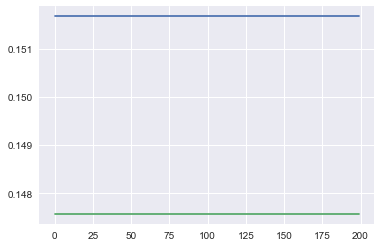

In [229]:
plt.plot([_ for _ in range(len(cmma))],cmma)
plt.plot([_ for _ in range(len(mmb))],mmb)

In [218]:
print(factor_mmb_cmma)

╒══════════════════════╤══════════════════╤══════════════════════════════════════════╕
│ money_market_bonus   │ collateral_mma   │   phi(money_market_bonus,collateral_mma) │
╞══════════════════════╪══════════════════╪══════════════════════════════════════════╡
│ money_market_bonus_0 │ collateral_mma_0 │                                   0.9049 │
├──────────────────────┼──────────────────┼──────────────────────────────────────────┤
│ money_market_bonus_0 │ collateral_mma_1 │                                   0.0799 │
├──────────────────────┼──────────────────┼──────────────────────────────────────────┤
│ money_market_bonus_1 │ collateral_mma_0 │                                   0.0751 │
├──────────────────────┼──────────────────┼──────────────────────────────────────────┤
│ money_market_bonus_1 │ collateral_mma_1 │                                   0.0953 │
╘══════════════════════╧══════════════════╧══════════════════════════════════════════╛


In [220]:
print(belief_nopriors['collateral_mma'].values[1])

0.151670177466


In [216]:
print(belief_nopriors['money_market_bonus'])

╒══════════════════════╤═══════════════════════════╕
│ money_market_bonus   │   phi(money_market_bonus) │
╞══════════════════════╪═══════════════════════════╡
│ money_market_bonus_0 │                    0.8524 │
├──────────────────────┼───────────────────────────┤
│ money_market_bonus_1 │                    0.1476 │
╘══════════════════════╧═══════════════════════════╛


In [797]:
#,
                     
#                      ('collateral_mma', 'checking_usd'), ('collateral_mma', 'cash_management'), 
#                      ('collateral_mma', 'fx_products'), ('collateral_mma', 'letters_of_credit'),
#                     ('collateral_mma', 'enterprise_sweep')
                     
#                     ])
esp_eligible_products = ['Money Market Bonus','Collateral MMA'
'Cash Management',
'FX Products',
'Letters of Credit',
'Enterprise Sweep',
'Checking USD']

def ESP_Markov_Model_Joint_Prob(esp_money_market_jointprob_probabilities,week_n_one_time= None,
                                      product_name = None,range_of_weeks=24,evidence_=None,single=True):
    """Returns the probability of having a given ESP product during a certain month.. 
    If no month_n is given, then will return distributions of each product per month for 24 months. 
    Otherwise, will only products for that month.
    If no product_name is given, then will return all products for a given month. Or, that particular product.
    
    WIth a single week_n_one_time set, return individual probabilities of 
    prob_checking, prob_cmma, prob_mmb, prob_cm, prob_fx, prob_loc, prob_es"""
    start_time = time.time()
    prob_mmb = []
    prob_cmma = []
    prob_cm = []
    prob_fx = []
    prob_loc = []
    prob_es = []
    prob_checking = []
    prob_checking_original = []
    prob_given_month_no_priors_having_product = {}
    products =['money_market_bonus','collateral_mma','cash_management',
                                        'fx_products','letters_of_credit','enterprise_sweep','checking_usd']
    
    model = MarkovModel([('money_market_bonus', 'collateral_mma'), ('money_market_bonus', 'checking_usd'), 
                     ('money_market_bonus', 'cash_management'), ('money_market_bonus', 'fx_products'),
                    ('money_market_bonus', 'letters_of_credit'), ('money_market_bonus', 'enterprise_sweep'),
                    ('collateral_mma','cash_management'),('collateral_mma', 'fx_products'),('collateral_mma', 'letters_of_credit'),
                        ('collateral_mma', 'enterprise_sweep'),('collateral_mma', 'checking_usd'),('cash_management', 'fx_products'),
                        ('cash_management', 'fx_products'),('cash_management', 'letters_of_credit'),('cash_management', 'enterprise_sweep'),
                        ('cash_management', 'checking_usd'),('fx_products', 'letters_of_credit'),('fx_products', 'enterprise_sweep'),
                         ('fx_products', 'checking_usd'),('letters_of_credit', 'enterprise_sweep'),('letters_of_credit', 'checking_usd'),
                         ('enterprise_sweep', 'checking_usd')])
    
    model_mmb = MarkovModel([('money_market_bonus', 'collateral_mma'), ('money_market_bonus', 'checking_usd'), 
                     ('money_market_bonus', 'cash_management'), ('money_market_bonus', 'fx_products'),
                    ('money_market_bonus', 'letters_of_credit'), ('money_market_bonus', 'enterprise_sweep')])
    model_cmma = MarkovModel([('collateral_mma','cash_management'),('collateral_mma', 'fx_products'),
                              ('collateral_mma', 'letters_of_credit'),
                        ('collateral_mma', 'enterprise_sweep'),('collateral_mma', 'checking_usd'),
                              ('money_market_bonus', 'collateral_mma')])
    model_cm = MarkovModel([('cash_management', 'fx_products'),('cash_management', 'letters_of_credit'),
                            ('cash_management', 'enterprise_sweep'),
                        ('cash_management', 'checking_usd'),('collateral_mma','cash_management'),('money_market_bonus', 'cash_management')])
    model_checking = MarkovModel([('cash_management', 'checking_usd'),('collateral_mma', 'checking_usd'),('money_market_bonus', 'checking_usd'),
                                 ('collateral_mma', 'checking_usd'),('letters_of_credit', 'checking_usd'),('enterprise_sweep', 'checking_usd'),
                                 ('fx_products', 'checking_usd')])
    model_fx = MarkovModel([('fx_products', 'letters_of_credit'),('fx_products', 'enterprise_sweep'),
                         ('fx_products', 'checking_usd'),('cash_management', 'fx_products'),('collateral_mma', 'fx_products'),
                           ('money_market_bonus', 'fx_products')])
    model_loc = MarkovModel([('letters_of_credit', 'enterprise_sweep'),('letters_of_credit', 'checking_usd'),('fx_products', 'letters_of_credit'),
                             ('cash_management', 'letters_of_credit'),('collateral_mma', 'letters_of_credit'), ('money_market_bonus', 'letters_of_credit') ])
    model_es = MarkovModel([('enterprise_sweep', 'checking_usd'),('letters_of_credit', 'enterprise_sweep'),('fx_products', 'enterprise_sweep'),
                           ('cash_management', 'enterprise_sweep'),('collateral_mma', 'enterprise_sweep'),('money_market_bonus', 'enterprise_sweep')])
    
    def markov_inference(dict_of_esp_jointprob):
        factor_mmb_cmma = Factor(variables=['money_market_bonus', 'collateral_mma'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_jointprob['mmb0_cmma0'], dict_of_esp_jointprob['mmb0_cmma1'],
                                    dict_of_esp_jointprob['mmb1_cmma0'], dict_of_esp_jointprob['mmb1_cmma1']])
        factor_mmb_cm = Factor(variables=['money_market_bonus', 'cash_management'],
                            cardinality=[2, 2],
                            values=[dict_of_esp_jointprob['mmb0_cm0'], dict_of_esp_jointprob['mmb0_cm1'],
                                    dict_of_esp_jointprob['mmb1_cm0'], dict_of_esp_jointprob['mmb1_cm1']])
        factor_mmb_fx = Factor(variables=['money_market_bonus', 'fx_products'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_jointprob['mmb0_fx0'], dict_of_esp_jointprob['mmb0_fx1'],
                                    dict_of_esp_jointprob['mmb1_fx0'], dict_of_esp_jointprob['mmb1_fx1']])
        factor_mmb_loc = Factor(variables=['money_market_bonus', 'letters_of_credit'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_jointprob['mmb0_loc0'], dict_of_esp_jointprob['mmb0_loc1'],
                                    dict_of_esp_jointprob['mmb1_loc0'], dict_of_esp_jointprob['mmb1_loc1']])
        factor_mmb_es = Factor(variables=['money_market_bonus', 'enterprise_sweep'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_jointprob['mmb0_es0'], dict_of_esp_jointprob['mmb0_es1'],
                                    dict_of_esp_jointprob['mmb1_es0'], dict_of_esp_jointprob['mmb1_es1']])  
        factor_mmb_checking = Factor(variables=['money_market_bonus', 'checking_usd'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_jointprob['mmb0_checking0'], dict_of_esp_jointprob['mmb0_checking1'],
                                    dict_of_esp_jointprob['mmb1_checking0'], dict_of_esp_jointprob['mmb1_checking1']])   
        # collateral mma

        factor_cmma_cm = Factor(variables=['collateral_mma','cash_management'],
                            cardinality=[2, 2],
                        values=[dict_of_esp_jointprob['cmma0_cm0'], dict_of_esp_jointprob['cmma0_cm1'],
                                dict_of_esp_jointprob['cmma1_cm0'], dict_of_esp_jointprob['cmma1_cm1']])

        factor_cmma_fx = Factor(variables=['collateral_mma', 'fx_products'],
                            cardinality=[2, 2],
                            values=[dict_of_esp_jointprob['cmma0_fx0'], dict_of_esp_jointprob['cmma0_fx1'],
                                    dict_of_esp_jointprob['cmma1_fx0'], dict_of_esp_jointprob['cmma1_fx1']])
        factor_cmma_loc = Factor(variables=['collateral_mma', 'letters_of_credit'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_jointprob['cmma0_loc0'], dict_of_esp_jointprob['cmma0_loc1'],
                                    dict_of_esp_jointprob['cmma1_loc0'], dict_of_esp_jointprob['cmma1_loc1']])
        factor_cmma_es= Factor(variables=['collateral_mma', 'enterprise_sweep'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_jointprob['cmma0_es0'], dict_of_esp_jointprob['cmma0_es1'],
                                    dict_of_esp_jointprob['cmma1_es0'], dict_of_esp_jointprob['cmma1_es1']])
        factor_cmma_checking = Factor(variables=['collateral_mma', 'checking_usd'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_jointprob['cmma0_checking0'], dict_of_esp_jointprob['cmma0_checking1'],
                                    dict_of_esp_jointprob['cmma1_checking0'],dict_of_esp_jointprob['cmma1_checking1']])  
        # cash management
        factor_cm_fx = Factor(variables=['cash_management', 'fx_products'],
                            cardinality=[2, 2],
                            values=[dict_of_esp_jointprob['cm0_fx0'], dict_of_esp_jointprob['cm0_fx1'],
                                    dict_of_esp_jointprob['cm1_fx0'], dict_of_esp_jointprob['cm1_fx1']])
        factor_cm_loc = Factor(variables=['cash_management', 'letters_of_credit'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_jointprob['cm0_loc0'], dict_of_esp_jointprob['cm0_loc1'],
                                    dict_of_esp_jointprob['cm1_loc0'], dict_of_esp_jointprob['cm1_loc1']])
        factor_cm_es= Factor(variables=['cash_management', 'enterprise_sweep'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_jointprob['cm0_es0'], dict_of_esp_jointprob['cm0_es1'],
                                    dict_of_esp_jointprob['cm1_es0'], dict_of_esp_jointprob['cm1_es1']])
        factor_cm_checking = Factor(variables=['cash_management', 'checking_usd'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_jointprob['cm0_checking0'], dict_of_esp_jointprob['cm0_checking1'],
                                    dict_of_esp_jointprob['cm1_checking0'], dict_of_esp_jointprob['cm1_checking1']])  

        # FX products
        factor_fx_loc = Factor(variables=['fx_products', 'letters_of_credit'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_jointprob['fx0_loc0'], dict_of_esp_jointprob['fx0_loc1'],
                                    dict_of_esp_jointprob['fx1_loc0'], dict_of_esp_jointprob['fx1_loc1']])
        factor_fx_es= Factor(variables=['fx_products', 'enterprise_sweep'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_jointprob['fx0_es0'], dict_of_esp_jointprob['fx0_es1'],
                                    dict_of_esp_jointprob['fx1_es0'], dict_of_esp_jointprob['fx1_es1']])
        factor_fx_checking = Factor(variables=['fx_products', 'checking_usd'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_jointprob['fx0_checking0'], dict_of_esp_jointprob['fx0_checking1'],
                                    dict_of_esp_jointprob['fx1_checking0'], dict_of_esp_jointprob['fx1_checking1']])  

        # letters of credit

        factor_loc_es= Factor(variables=['letters_of_credit', 'enterprise_sweep'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_jointprob['loc0_es0'], dict_of_esp_jointprob['loc0_es1'],
                                    dict_of_esp_jointprob['loc1_es0'], dict_of_esp_jointprob['loc1_es1']])
        factor_loc_checking = Factor(variables=['letters_of_credit', 'checking_usd'],
                         cardinality=[2, 2],
                         values=[dict_of_esp_jointprob['loc0_checking0'], dict_of_esp_jointprob['loc0_checking1'],
                                dict_of_esp_jointprob['loc1_checking0'], dict_of_esp_jointprob['loc1_checking1']])  
        #enterprise sweep

        factor_es_checking = Factor(variables=['enterprise_sweep', 'checking_usd'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_jointprob['es0_checking0'], dict_of_esp_jointprob['es0_checking1'],
                                    dict_of_esp_jointprob['es1_checking0'], dict_of_esp_jointprob['es1_checking1']])  


        model.add_factors(factor_mmb_cmma , factor_mmb_cm, factor_mmb_fx, factor_mmb_loc,factor_mmb_es, factor_mmb_checking,
                          factor_cmma_cm , factor_cmma_fx, factor_cmma_loc, factor_cmma_es,factor_cmma_checking,
             factor_cm_fx,   factor_cm_loc,    factor_cm_es,  factor_cm_checking , factor_fx_loc,
                  factor_fx_es ,  factor_fx_checking,   factor_loc_es, factor_loc_checking , factor_es_checking )#,
        model_mmb.add_factors(factor_mmb_cmma , factor_mmb_cm, factor_mmb_fx, factor_mmb_loc,factor_mmb_es, factor_mmb_checking)
        model_cmma.add_factors(factor_cmma_cm , factor_cmma_fx, factor_cmma_loc, factor_cmma_es,factor_cmma_checking,factor_mmb_cmma )
        model_cm.add_factors(factor_cm_fx,   factor_cm_loc,    factor_cm_es,  factor_cm_checking,factor_cmma_cm,factor_mmb_cm)
        model_checking.add_factors(factor_mmb_checking,factor_cmma_checking,factor_cm_checking,factor_fx_checking,factor_loc_checking , factor_es_checking)
        model_fx.add_factors(factor_fx_es ,  factor_fx_checking,factor_fx_loc, factor_cm_fx,factor_cmma_fx,factor_mmb_fx)
        model_loc.add_factors(factor_loc_es, factor_loc_checking, factor_fx_loc,factor_cm_loc,factor_cmma_loc,factor_mmb_loc  )
        model_es.add_factors(factor_es_checking ,factor_loc_es,factor_fx_es,factor_cm_es,factor_mmb_es,factor_cmma_es)
        #print(model.markov_blanket('money_market_bonus'))
        belief_propagation = BeliefPropagation(model)
        belief_propagation_mmb = BeliefPropagation(model_mmb)
        belief_propagation_cmma = BeliefPropagation(model_cmma)
        belief_propagation_cm = BeliefPropagation(model_cm)
        belief_propagation_checking = BeliefPropagation(model_checking)
        belief_propagation_fx = BeliefPropagation(model_fx)
        belief_propagation_loc = BeliefPropagation(model_loc)
        belief_propagation_es = BeliefPropagation(model_es)
        #var_elimination = VariableElimination(model)
        
        all_products = ['money_market_bonus','collateral_mma', 'cash_management','enterprise_sweep',
                                    'fx_products','letters_of_credit','checking_usd']
        

        # perform inference for all product except the one in the for loop
        for prod in all_products:
            if evidence_==None:
                new_evidence=evidence_

            else:
                new_evidence = {key: value for key, value in evidence_.items() 
                 if key != prod}
            belief_inference_products = str(prod)
            #print(belief_inference_products,'belief inference')
        # go through and only look at one varaible at a time for inference


            belief = belief_propagation.query(variables=[belief_inference_products], evidence=new_evidence)
            belief_mmb = belief_propagation_mmb.query(variables=[belief_inference_products], evidence=new_evidence)
            belief_cmma = belief_propagation_cmma.query(variables=[belief_inference_products], evidence=new_evidence)
            belief_cm = belief_propagation_cm.query(variables=[belief_inference_products], evidence=new_evidence)
            belief_checking = belief_propagation_checking.query(variables=[belief_inference_products], evidence=new_evidence)
            belief_fx = belief_propagation_fx.query(variables=[belief_inference_products], evidence=new_evidence)
            belief_loc = belief_propagation_loc.query(variables=[belief_inference_products], evidence=new_evidence)
            belief_es = belief_propagation_es.query(variables=[belief_inference_products], evidence=new_evidence)
            #return belief_nopriors
            try:
                mmb = belief_mmb['money_market_bonus'].values[1]
                if mmb <0 :
                    mmb = .0000001
                elif mmb >1:
                    mmb =1
                prob_mmb.append(mmb)# one is having the product
            except:
                pass
            try:
                cmma = belief_cmma['collateral_mma'].values[1]
                if cmma <0:
                    cmma = .0000001
                elif cmma >1:
                    cmma =1
                prob_cmma.append(cmma)
            except:## don't have this product
                pass
            try:
                cm = belief_cm['cash_management'].values[1]
                if cm <0:
                    cm = .0000001
                elif cm >1:
                    cm =1
                prob_cm.append(cm)
            except:
                pass
            try:
                checking = belief_checking['checking_usd'].values[1]
                if checking <0:
                    checking = .0000001
                elif checking >1:
                    checking =1
                prob_checking.append(checking)
            except:
                pass
            try:
                fx = belief_fx['fx_products'].values[1]
                if fx <0:
                    fx = .0000001
                elif fx >1:
                    fx =1
                prob_fx.append(fx)
            except:
                pass
            try:
                loc = belief_loc['letters_of_credit'].values[1]
                if loc <0:
                    loc = .0000001
                elif loc > 1:
                    loc = 1
                prob_loc.append(loc)
            except:
                
                pass
            try:
                es = belief_es['enterprise_sweep'].values[1]
                if es<0:
                    es = .0000001
                elif es >1:
                    es = 1
                prob_es.append(es)
            except:
                pass



    if single==False:
        for week_n_loop in range(range_of_weeks):
            dict_of_esp_jointprob = esp_money_market_jointprob_probabilities(week_n_loop)
            markov_inference(dict_of_esp_jointprob)
    else:
        dict_of_esp_jointprob = esp_money_market_jointprob_probabilities(week_n_one_time)
        markov_inference(dict_of_esp_jointprob)
        # the order of the factor model is a0_b0, a0_b1, ,a1_b0, a1_b1
        #http://conference.scipy.org/proceedings/scipy2015/pdfs/ankur_ankan.pdf
        
    print(prob_checking,'checking', prob_cmma,'cmma', prob_mmb,'mmb', prob_cm,'cm', prob_fx,'fx', prob_loc,'loc',
          prob_es,'es',prob_checking_original,'checking original')
    #return prob_checking, prob_cmma, prob_mmb, prob_cm, prob_fx, prob_loc, prob_es, prob_checking_original
    return prob_checking[0], prob_cmma[0], prob_mmb[0], prob_cm[0], prob_fx[0], prob_loc[0], prob_es[0]

    end_time = time.time()
    print('{} weeks took {} seconds'.format(range_of_weeks,end_time-start_time))

        


In [687]:
q = {'123':234,'34':234}

In [703]:
q

{'123': 234, '34': 234}

In [702]:
r = ['hello','bye']

In [696]:
t = r.remove('hello')

In [704]:
q = r.copy()

In [707]:
q

['hello', 'bye']

In [708]:
q.remove('hello')

In [709]:
q

['bye']

In [790]:
len(None)

TypeError: object of type 'NoneType' has no len()

In [688]:
for i in q.items():
    print(i)

('123', 234)
('34', 234)


In [804]:
.000040157 * 10_000

0.40157000000000004

In [805]:
checking, cmma, mmb , cm, fx, loc, es = ESP_Markov_Model_Joint_Prob(ESP_Joint_Product_Probabilities,single=True,
                                                                    week_n_one_time=2) 

[4.0078804496253169e-05] checking [2.3858038093548626e-06] cmma [2.1172230195836294e-08] mmb [1.0941175252123749e-06] cm [3.9633209175787338e-07] fx [2.139311139849487e-07] loc [1e-07] es [] checking original


In [786]:
checking, cmma, mmb , cm, fx, loc, es = ESP_Markov_Model_Joint_Prob(ESP_Joint_Product_Probabilities,single=True,
                                                                    week_n_one_time=1,
                                            evidence_={'money_market_bonus':0,'collateral_mma':0,
                                                       'cash_management':0,'enterprise_sweep':0,
                                    'fx_products':0,'letters_of_credit':0,'checking_usd':0}) 

[4.0354005480437385e-06] checking [3.8571849160913087e-09] cmma [-1.1099880193271565e-10] mmb [-6.1946485285373075e-09] cm [2.0866482658597157e-09] fx [-3.8079332435125275e-10] loc [-1.4592754882071724e-10] es [4.035400548043741e-06] checking original


In [782]:
sum([np.random.choice([1,0],p=np.array([checking,(1-checking)])) for _ in range(100000)])

0

In [761]:
ESP_Markov_Model_Joint_Prob(ESP_Joint_Product_Probabilities,single=True,week_n_one_time=1,
                                            evidence_={'money_market_bonus':0,'collateral_mma':0,
                                                       'cash_management':0,'enterprise_sweep':0,
                                    'fx_products':0,'letters_of_credit':0,'checking_usd':0}) 

[4.0354005480437385e-06] checking [3.8571849160913087e-09] cmma [-1.1099880193271565e-10] mmb [-6.1946485285373075e-09] cm [2.0866482658597157e-09] fx [-3.8079332435125275e-10] loc [-1.4592754882071724e-10] es [4.035400548043741e-06] checking original


(4.0354005480437385e-06,
 3.8571849160913087e-09,
 -1.1099880193271565e-10,
 -6.1946485285373075e-09,
 2.0866482658597157e-09,
 -3.8079332435125275e-10,
 -1.4592754882071724e-10)

In [760]:
ESP_Markov_Model_Joint_Prob(ESP_Joint_Product_Probabilities,single=True,week_n_one_time=20,
                                            evidence_={'money_market_bonus':1,'collateral_mma':1,
                                                       'cash_management':1,'enterprise_sweep':1,
                                    'fx_products':1,'letters_of_credit':1,'checking_usd':1}) 

[1.0000330502700987] checking [1.04553458234917] cmma [0.74728153013867094] mmb [0.94206236852484204] cm [0.047931926065992621] fx [1.0087517421642502] loc [0.48742317172106725] es [1.0000330502700987] checking original


(1.0000330502700987,
 1.04553458234917,
 0.74728153013867094,
 0.94206236852484204,
 0.047931926065992621,
 1.0087517421642502,
 0.48742317172106725)

In [676]:
checking, cmma, mmb, cm, fx, loc, es = ESP_Markov_Model_Joint_Prob(ESP_Joint_Product_Probabilities,single=True,week_n_one_time=100)

[4.3698345599389846e-05] checking [1.3548142644674604e-05] cmma [1.9192892520880829e-06] mmb [1.3754136770404781e-05] cm [1.3842988279675637e-06] fx [6.6005183489786797e-07] loc [1.9522484836281464e-06] es


In [677]:
1-checking

0.99995630165440064

In [678]:
# get a checking account
np.random.choice(np.array([1,0]),p=np.array([checking,(1-checking)]))

0

In [684]:
probs = [ESP_Markov_Model_Joint_Prob(ESP_Joint_Product_Probabilities,single=True,week_n_one_time=i) for i in range(104)]

[4.0091850456980385e-05] checking [2.4847536246721044e-06] cmma [8.1118572306544674e-09] mmb [7.5712040617391485e-07] cm [4.7598686233406473e-07] fx [2.4091422692550762e-07] loc [-2.6454800004785118e-09] es
[4.0157709922530933e-05] checking [2.4371304897881454e-06] cmma [1.4647173755742599e-08] mmb [9.3796030354556138e-07] cm [4.3434707687037728e-07] fx [2.2717228803244751e-07] loc [-2.3626294761307096e-09] es
[4.0078804496253169e-05] checking [2.385803809354863e-06] cmma [2.1172230195836284e-08] mmb [1.0941175252123753e-06] cm [3.9633209175787338e-07] fx [2.139311139849487e-07] loc [-2.0753238062193082e-09] es
[3.9867200617693251e-05] checking [2.3315514540312654e-06] cmma [2.7560837451058397e-08] mmb [1.2280133506349967e-06] cm [3.616345470161856e-07] fx [2.0120891231930975e-07] loc [-1.7825754268299932e-09] es
[3.9534856816906668e-05] checking [2.2750667706192526e-06] cmma [3.3711735486648528e-08] mmb [1.3418729873394645e-06] cm [3.2997201066255994e-07] fx [1.8901797577349682e-07] l

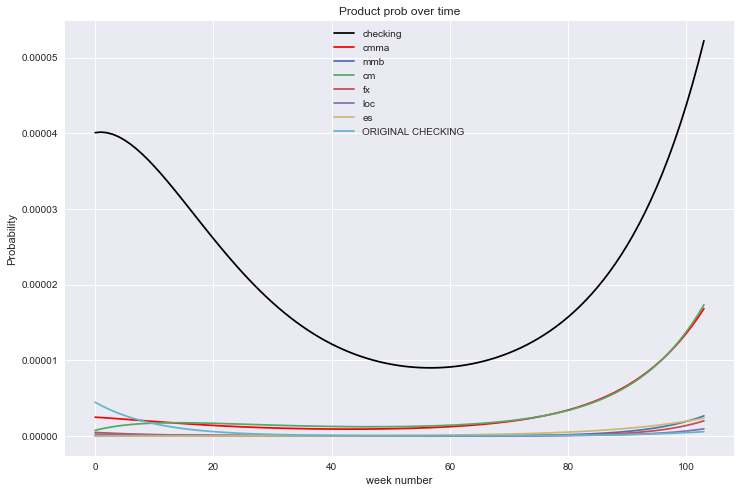

In [685]:
## FINAL
plt.figure(figsize=(12,8))
plt.plot([probs[i][0] for i in range(len(probs))],label='checking',color='black')
plt.plot([probs[i][1] for i in range(len(probs))],label='cmma',color='red')
plt.plot([probs[i][2] for i in range(len(probs))],label='mmb')
plt.plot([probs[i][3] for i in range(len(probs))],label='cm')
plt.plot([probs[i][4] for i in range(len(probs))],label='fx')
plt.plot([probs[i][5] for i in range(len(probs))],label='loc')
plt.plot([probs[i][6] for i in range(len(probs))],label='es')
plt.plot([probs[i][7] for i in range(len(probs))],label='ORIGINAL CHECKING')
plt.legend()
plt.title('Product prob over time')
plt.xlabel('week number')
plt.ylabel('Probability')

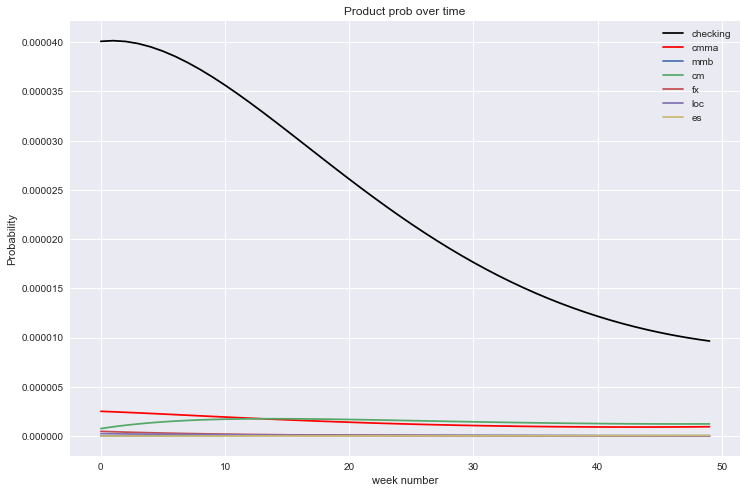

In [611]:
## FINAL
plt.figure(figsize=(12,8))
plt.plot([probs[i][0] for i in range(len(probs))],label='checking',color='black')
plt.plot([probs[i][1] for i in range(len(probs))],label='cmma',color='red')
plt.plot([probs[i][2] for i in range(len(probs))],label='mmb')
plt.plot([probs[i][3] for i in range(len(probs))],label='cm')
plt.plot([probs[i][4] for i in range(len(probs))],label='fx')
plt.plot([probs[i][5] for i in range(len(probs))],label='loc')
plt.plot([probs[i][6] for i in range(len(probs))],label='es')
plt.legend()
plt.title('Product prob over time')
plt.xlabel('week number')
plt.ylabel('Probability')